In [290]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
from matplotlib import pyplot as plt
from preprocessing import process_handwriting, data_import_handwriting
import numpy as np
from tensorflow.math import confusion_matrix


In [139]:
data_path = "./CS671-DLA-Assignment4-Data-2022/Handwriting_Data"
x_train, y_train, x_test, y_test = data_import_handwriting(data_path)
# print(x_train[3].shape)
x_max=np.nan
# x_train, x_max = padding_sequences(x_train)
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
# print(y_train)
# x_test = padding_sequences(x_test)


In [140]:
x_train[100]

array([[0.15789411, 0.5416664 ],
       [0.13158041, 0.5416664 ],
       [0.10526274, 0.5416664 ],
       [0.07894904, 0.5416664 ],
       [0.02631767, 0.58332966],
       [0.        , 0.66666247],
       [0.05263137, 0.74999528],
       [0.10526274, 0.79166483],
       [0.21052548, 0.83333438],
       [0.26315685, 0.83333438],
       [0.26315685, 0.66666247],
       [0.21052548, 0.5416664 ],
       [0.15789411, 0.37500079],
       [0.13158041, 0.20833517],
       [0.10526274, 0.08333281],
       [0.13158041, 0.04166955],
       [0.18421178, 0.        ],
       [0.26315685, 0.04166955],
       [0.28947452, 0.08333281],
       [0.31578822, 0.12500236],
       [0.34210589, 0.16666562],
       [0.36841959, 0.20833517],
       [0.39473726, 0.20833517],
       [0.39473726, 0.16666562],
       [0.44736863, 0.12500236],
       [0.52631767, 0.08333281],
       [0.57894904, 0.12500236],
       [0.60526274, 0.20833517],
       [0.63158041, 0.41666405],
       [0.63158041, 0.58332966],
       [0.

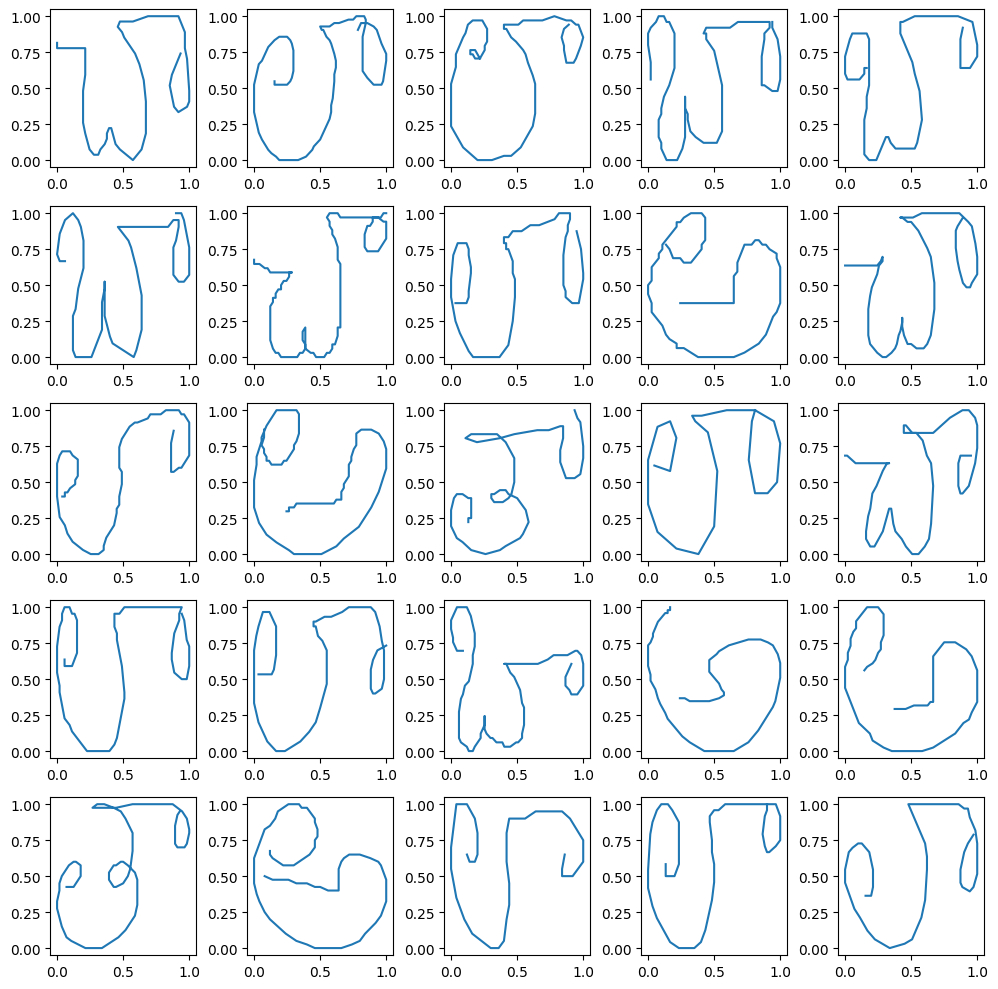

In [141]:
import matplotlib.pyplot as plt
rand_idx = np.random.randint(0,344,(25,))
plt.figure(figsize=(10,10))
for i, idx in enumerate(rand_idx):
    plt.subplot(5,5,i+1)
    plt.plot(x_train[idx][:, 0], x_train[idx][:, 1])
plt.tight_layout()
plt.show()

In [142]:
# x_train[0]

# Handwriting

## RNN-Architecture1

In [151]:
rnn = load_model("./models/handwriting_rnn1.h5")
rnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 2)]     0           []                               
                                                                                                  
 masking (Masking)              (None, 200, 2)       0           ['input_1[0][0]']                
                                                                                                  
 simple_rnn (SimpleRNN)         [(None, 32),         1120        ['masking[0][0]']                
                                 (None, 32)]                                                      
                                                                                                  
 concatenate (Concatenate)      (None, 64)           0           ['simple_rnn[0][0]',         

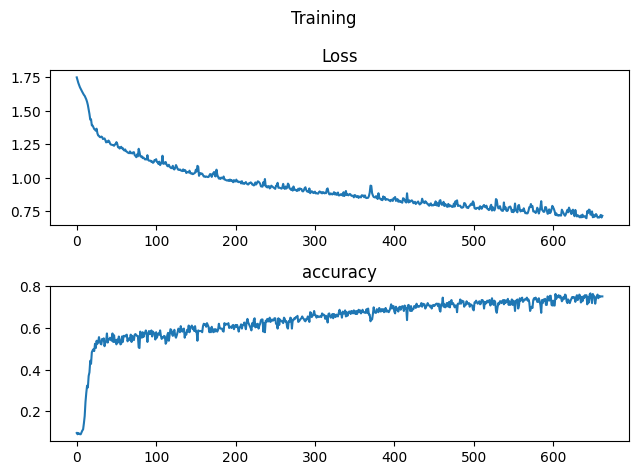

In [152]:
with open("./logs/hist_handrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [153]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [154]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 3ms/step
[[67  1  0  0  1]
 [ 0 33  4 18 12]
 [ 0  6 50  0 14]
 [ 0  3  0 62  3]
 [ 0 10 11  8 40]]


In [155]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 3ms/step - loss: 0.7190 - accuracy: 0.7347


[0.7189947366714478, 0.7346938848495483]

In [156]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.7800


[0.6747867465019226, 0.7799999713897705]

In [157]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 3ms/step
[[20  0  0  0  0]
 [ 0  8  1  8  3]
 [ 0  2 17  0  1]
 [ 0  1  0 17  2]
 [ 0  3  0  1 16]]


## RNN-Architecture2

In [302]:
rnn = load_model("./models/handwriting_rnn2.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 10)           130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200, 5)            80        
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 5)                 5005      
                                                                 
Total params: 5,215
Trainable params: 5,215
Non-trainable params: 0
_________________________________________________________________


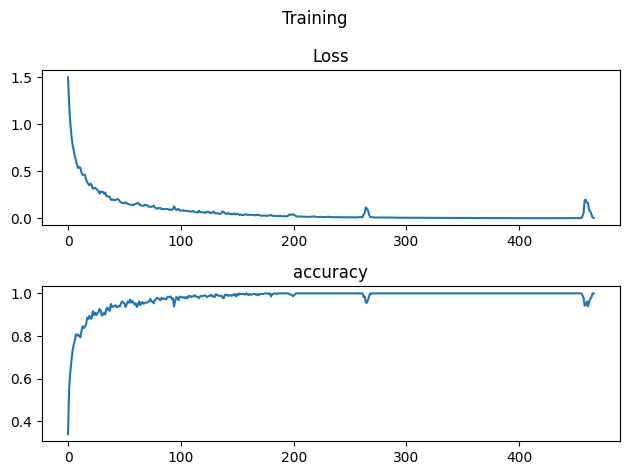

In [303]:
with open("./logs/hist_handrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [304]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [305]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 5ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [306]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 1.0000


[0.004333095159381628, 1.0]

In [307]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 5ms/step - loss: 0.1999 - accuracy: 0.9800


[0.19993121922016144, 0.9800000190734863]

In [308]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 5ms/step
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  2 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


## RNN-Architecture3

In [309]:
rnn = load_model("./models/handwriting_rnn3.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 10)           130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200, 15)           390       
                                                                 
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 200)               600200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

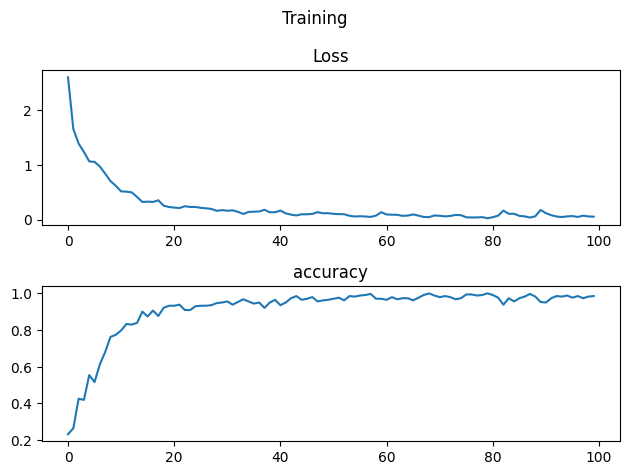

In [310]:
with open("./logs/hist_handrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [311]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [312]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 6ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  1 69  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [313]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9971


[0.014580887742340565, 0.9970845580101013]

In [314]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.1164 - accuracy: 0.9700


[0.11637511849403381, 0.9700000286102295]

In [315]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 6ms/step
[[20  0  0  0  0]
 [ 0 19  1  0  0]
 [ 0  1 18  0  1]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


## LSTM-Architecture1

In [316]:
rnn = load_model("./models/handwriting_lstm1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 32)           4480      
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 5)                 32005     
                                                                 
Total params: 36,485
Trainable params: 36,485
Non-trainable params: 0
_________________________________________________________________


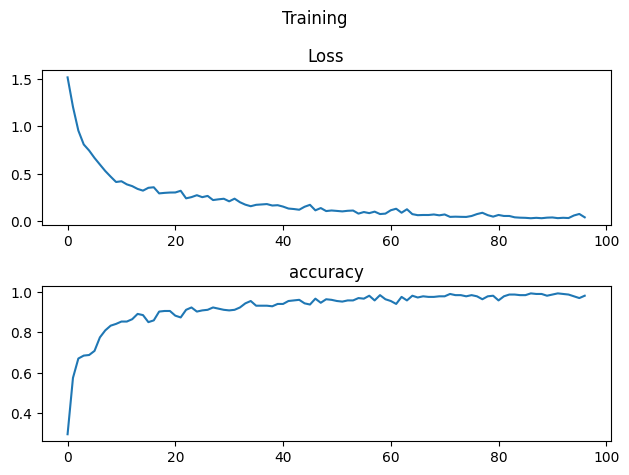

In [317]:
with open("./logs/hist_handlstm1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [318]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [319]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 6ms/step
[[69  0  0  0  0]
 [ 0 61  6  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [320]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 6ms/step - loss: 0.0529 - accuracy: 0.9825


[0.052928995341062546, 0.9825072884559631]

In [321]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.0677 - accuracy: 0.9700


[0.06769145280122757, 0.9700000286102295]

In [322]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 6ms/step
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  1 18  0  1]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


## LSTM-Architecture2

In [323]:
rnn = load_model("./models/handwriting_lstm2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 10)           520       
                                                                 
 lstm_1 (LSTM)               (None, 200, 5)            320       
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 5)                 5005      
                                                                 
Total params: 5,845
Trainable params: 5,845
Non-trainable par

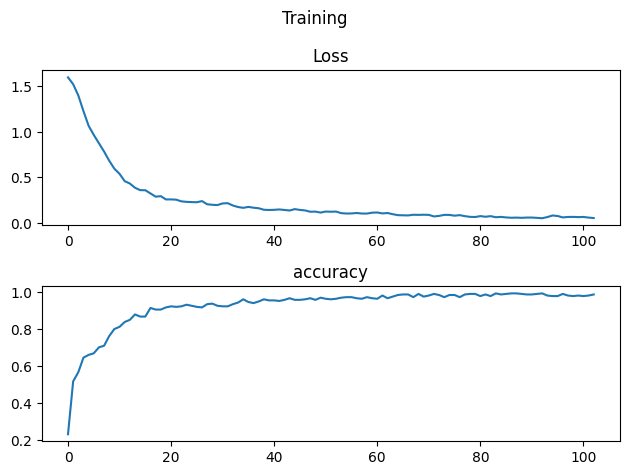

In [324]:
with open("./logs/hist_handlstm2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [325]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [326]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 11ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  3 67  0  0]
 [ 0  0  0 68  0]
 [ 0  1  1  0 67]]


In [327]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 8ms/step - loss: 0.0497 - accuracy: 0.9854


[0.04968438670039177, 0.9854227304458618]

In [328]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 29ms/step - loss: 0.0936 - accuracy: 0.9700


[0.09356758743524551, 0.9700000286102295]

In [329]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 8ms/step
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  2 18  0  0]
 [ 0  0  0 20  0]
 [ 0  1  0  0 19]]


## LSTM-Architecture3

In [330]:
rnn = load_model("./models/handwriting_lstm3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 10)           520       
                                                                 
 lstm_1 (LSTM)               (None, 200, 15)           1560      
                                                                 
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 200)               600200    
                                                                 
 dropout (Dropout)           (None, 200)               0     

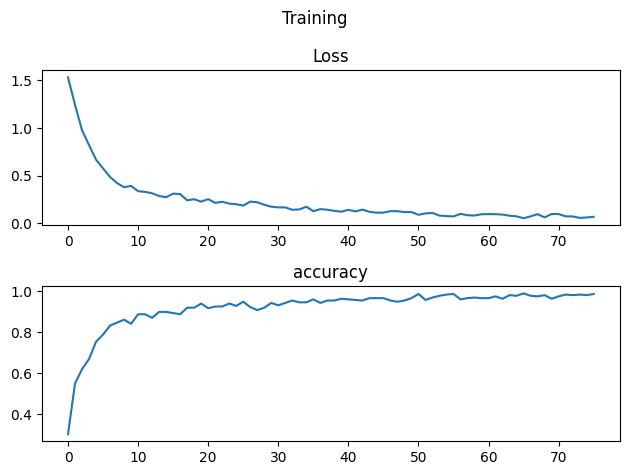

In [331]:
with open("./logs/hist_handlstm3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [332]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [333]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 9ms/step
[[69  0  0  0  0]
 [ 0 65  2  0  0]
 [ 0  1 69  0  0]
 [ 0  0  0 68  0]
 [ 0  1  0  0 68]]


In [334]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 9ms/step - loss: 0.0418 - accuracy: 0.9883


[0.041828595101833344, 0.9883381724357605]

In [335]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 9ms/step - loss: 0.1579 - accuracy: 0.9400


[0.15790453553199768, 0.9399999976158142]

In [336]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 9ms/step
[[20  0  0  0  0]
 [ 0 16  3  0  1]
 [ 0  1 19  0  0]
 [ 0  0  0 19  1]
 [ 0  0  0  0 20]]


# CV

In [105]:
from preprocessing import data_import_cv

In [106]:
x_train, y_train, x_test, y_test = data_import_cv("./CS671-DLA-Assignment4-Data-2022/CV_Data/")
mask_val=100_000.0
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=79)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=79)

y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [107]:
x_train_padded[0].shape

(79, 39)

## RNN-Architecture1

In [108]:
rnn = load_model("./models/cv_rnn1.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 64)            6656      
                                                                 
 flatten (Flatten)           (None, 5056)              0         
                                                                 
 dense (Dense)               (None, 5)                 25285     
                                                                 
Total params: 31,941
Trainable params: 31,941
Non-trainable params: 0
_________________________________________________________________


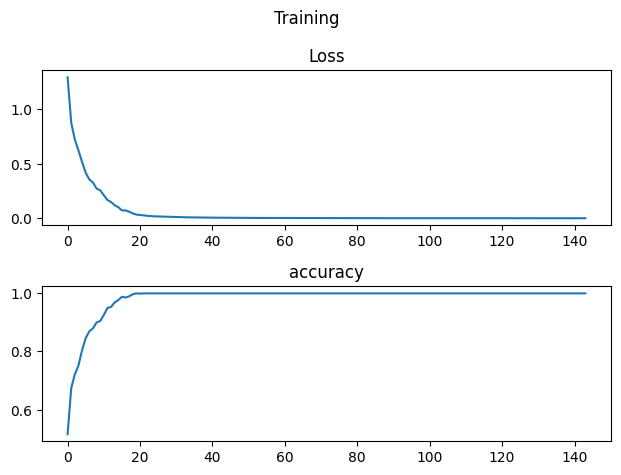

In [109]:
with open("./logs/hist_cvrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [110]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 2ms/step
[[408   0   0   0   0]
 [  0 510   0   0   0]
 [  0   0 383   0   0]
 [  0   0   0 343   0]
 [  0   0   0   0 318]]


In [111]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 2ms/step - loss: 7.0663e-05 - accuracy: 1.0000


[7.066263788146898e-05, 1.0]

In [112]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 2ms/step - loss: 2.2551 - accuracy: 0.6925


[2.2551426887512207, 0.6924643516540527]

In [113]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 2ms/step
[[63 22 13  2  2]
 [20 80 16  7  4]
 [14 17 56  7  2]
 [11  7  4 63  1]
 [ 1  0  0  1 78]]


## RNN-Architecture2

In [114]:
rnn = load_model("./models/cv_rnn2.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 32)            2304      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 79, 16)            784       
                                                                 
 flatten (Flatten)           (None, 1264)              0         
                                                                 
 dense (Dense)               (None, 20)                25300     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

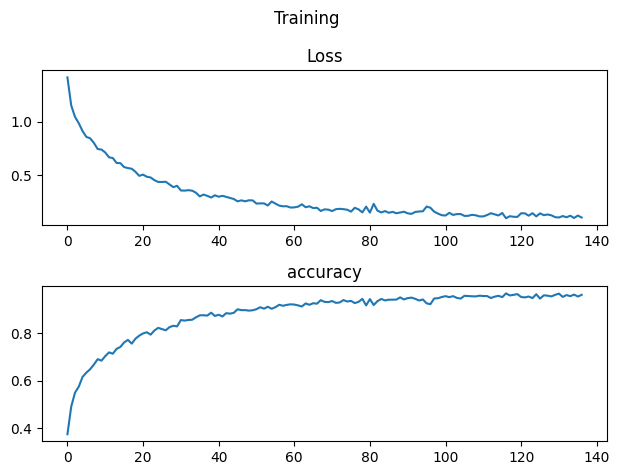

In [115]:
with open("./logs/hist_cvrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [116]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 3ms/step
[[408   0   0   0   0]
 [  0 506   4   0   0]
 [  0   0 383   0   0]
 [  0   2   1 339   1]
 [  0   0   0   1 317]]


In [117]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9954


[0.02049853466451168, 0.9954128265380859]

In [118]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 3ms/step - loss: 2.8725 - accuracy: 0.6415


[2.8725202083587646, 0.6415478587150574]

In [119]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 3ms/step
[[47 37 10  8  0]
 [15 71 29  9  3]
 [ 8 20 58  7  3]
 [ 3 11  7 63  2]
 [ 1  0  2  1 76]]


## RNN-Architecture3

In [127]:
rnn = load_model("./models/cv_rnn3.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 10)            500       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 79, 15)            390       
                                                                 
 flatten (Flatten)           (None, 1185)              0         
                                                                 
 dense (Dense)               (None, 200)               237200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

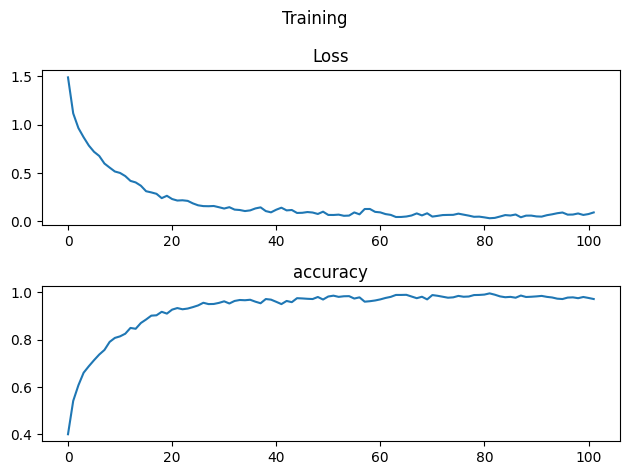

In [128]:
with open("./logs/hist_cvrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [129]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 3ms/step
[[408   0   0   0   0]
 [  1 509   0   0   0]
 [  1   0 382   0   0]
 [  0   0   0 343   0]
 [  0   0   0   0 318]]


In [130]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9990


[0.00847588013857603, 0.9989806413650513]

In [131]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 5ms/step - loss: 2.6207 - accuracy: 0.6415


[2.6206984519958496, 0.6415478587150574]

In [132]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 3ms/step
[[59 23 13  4  3]
 [17 75 25  8  2]
 [11 21 54  5  5]
 [ 9  7 10 54  6]
 [ 2  2  2  1 73]]


## LSTM-Architecture1

In [126]:
rnn = load_model("./models/cv_lstm1.h5")
rnn.summary()

OSError: No file or directory found at ./models/cv_lstm1.h5

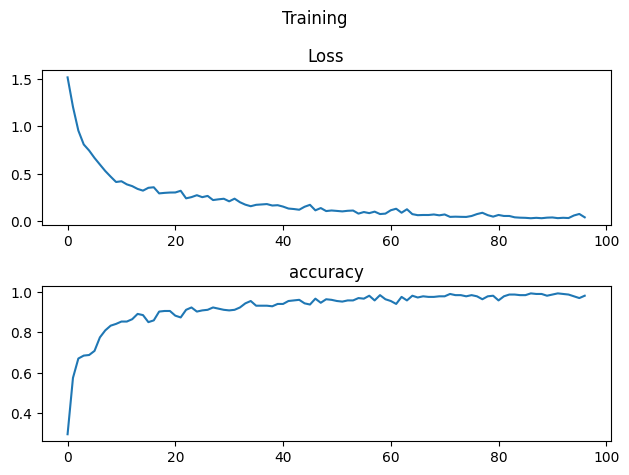

In [ ]:
with open("./logs/hist_cvlstm1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [ ]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 6ms/step
[[69  0  0  0  0]
 [ 0 61  6  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 68  0]
 [ 0  0  0  0 69]]


In [ ]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 6ms/step - loss: 0.0529 - accuracy: 0.9825


[0.052928995341062546, 0.9825072884559631]

In [ ]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.0677 - accuracy: 0.9700


[0.06769145280122757, 0.9700000286102295]

In [ ]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 6ms/step
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  1 18  0  1]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


## LSTM-Architecture2

In [ ]:
rnn = load_model("./models/cv_lstm2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 10)           520       
                                                                 
 lstm_1 (LSTM)               (None, 200, 5)            320       
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 5)                 5005      
                                                                 
Total params: 5,845
Trainable params: 5,845
Non-trainable par

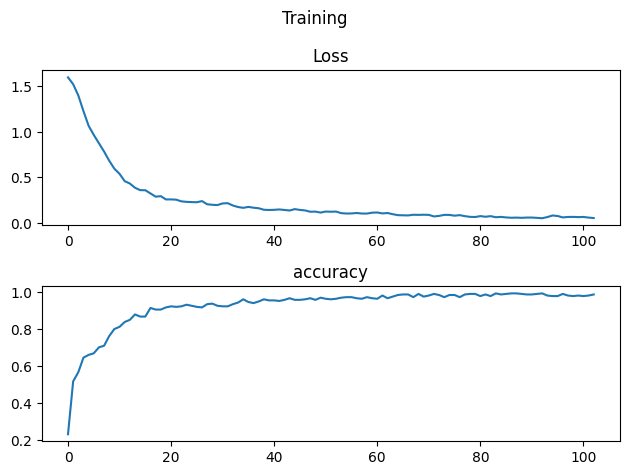

In [ ]:
with open("./logs/hist_cvlstm2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [ ]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 11ms/step
[[69  0  0  0  0]
 [ 0 67  0  0  0]
 [ 0  3 67  0  0]
 [ 0  0  0 68  0]
 [ 0  1  1  0 67]]


In [ ]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 8ms/step - loss: 0.0497 - accuracy: 0.9854


[0.04968438670039177, 0.9854227304458618]

In [ ]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 29ms/step - loss: 0.0936 - accuracy: 0.9700


[0.09356758743524551, 0.9700000286102295]

In [ ]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 8ms/step
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  2 18  0  0]
 [ 0  0  0 20  0]
 [ 0  1  0  0 19]]


## LSTM-Architecture3

In [ ]:
rnn = load_model("./models/cv_lstm3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 10)           520       
                                                                 
 lstm_1 (LSTM)               (None, 200, 15)           1560      
                                                                 
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 200)               600200    
                                                                 
 dropout (Dropout)           (None, 200)               0     

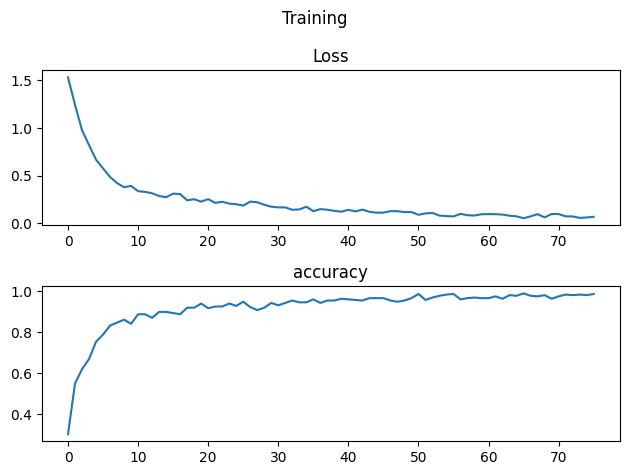

In [ ]:
with open("./logs/hist_cvlstm3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [ ]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 9ms/step
[[69  0  0  0  0]
 [ 0 65  2  0  0]
 [ 0  1 69  0  0]
 [ 0  0  0 68  0]
 [ 0  1  0  0 68]]


In [ ]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 9ms/step - loss: 0.0418 - accuracy: 0.9883


[0.041828595101833344, 0.9883381724357605]

In [ ]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 9ms/step - loss: 0.1579 - accuracy: 0.9400


[0.15790453553199768, 0.9399999976158142]

In [ ]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 9ms/step
[[20  0  0  0  0]
 [ 0 16  3  0  1]
 [ 0  1 19  0  0]
 [ 0  0  0 19  1]
 [ 0  0  0  0 20]]
